Training the Regression Model:

Using the training set prepared in the previous component, train the selected regression model.
The model will learn the patterns and relationships between the input features and the fare amount.

# Polynomial LinearRegression


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('uber.csv')

# Convert the pickup_datetime column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract date and time from pickup_datetime
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_time'] = df['pickup_datetime'].dt.time
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Drop the original datetime columns if not needed
df = df.drop(columns=['pickup_datetime'])

# Convert date columns to numerical format
df['pickup_date'] = pd.to_datetime(df['pickup_date']).astype('int64') // 10**9  # Convert to Unix timestamp
df['pickup_time'] = df['pickup_time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)  # Convert to seconds

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[df.columns] = imputer.fit_transform(df)

# Select numerical columns for scaling
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Assuming 'fare_amount' is the column you want to predict
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

# Split the dataset into training and testing sets with a 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print (X_train)
print('\n')
print (X_test)
print('\n')
print (y_train)
print('\n')
print (y_test)


              id  pickup_longitude  pickup_latitude  dropoff_longitude  \
21269   0.786252         -0.127983         0.104689          -0.110409   
187660  0.682821         -0.127562         0.106441          -0.111856   
774    -1.082326         -0.127260         0.103499          -0.108885   
184577  0.939571         -0.127989         0.105485          -0.110861   
37127  -0.986532         -0.127190         0.102006          -0.112458   
...          ...               ...              ...                ...   
119879 -1.626890         -0.126606         0.106173          -0.110342   
103694 -1.665507         -0.127632         0.105513          -0.111128   
131932  1.605801         -0.128104         0.106570          -0.112572   
146867  1.426427         -0.125280         0.106421          -0.109262   
121958  1.164437         -0.127767         0.108972          -0.108866   

        dropoff_latitude  passenger_count  pickup_date  pickup_time  \
21269           0.123228        -0.49389

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Transform the features to polynomial features
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

print(X_train_poly)
print('\n')
print (X_test_poly)


[[ 1.00000000e+00  7.15004388e-01  5.11231275e-01]
 [ 1.00000000e+00  5.21225786e+00  2.71676320e+01]
 [ 1.00000000e+00  1.86272445e+00  3.46974237e+00]
 [ 1.00000000e+00  7.11881057e+00  5.06774640e+01]
 [ 1.00000000e+00  1.84416381e+00  3.40094017e+00]
 [ 1.00000000e+00  9.98977018e-01  9.97955082e-01]
 [ 1.00000000e+00  5.14565890e+00  2.64778055e+01]
 [ 1.00000000e+00  1.96849994e+00  3.87499201e+00]
 [ 1.00000000e+00  7.68204494e-01  5.90138145e-01]
 [ 1.00000000e+00 -1.41820205e+00  2.01129706e+00]
 [ 1.00000000e+00 -2.36282052e+00  5.58292081e+00]
 [ 1.00000000e+00 -3.32471067e-01  1.10537011e-01]
 [ 1.00000000e+00 -3.68766753e+00  1.35988918e+01]
 [ 1.00000000e+00 -2.59833764e+00  6.75135851e+00]
 [ 1.00000000e+00 -9.29917109e-01  8.64745830e-01]
 [ 1.00000000e+00  4.93183364e+00  2.43229830e+01]
 [ 1.00000000e+00  6.89059504e+00  4.74803000e+01]
 [ 1.00000000e+00  3.20534281e+00  1.02742225e+01]
 [ 1.00000000e+00  1.53095309e+00  2.34381737e+00]
 [ 1.00000000e+00 -2.48223722e+

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

In [ ]:
# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

print(y_train_pred)
print('\n')
print('\n')
print (y_test_pred)

In [ ]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")

In [ ]:
# Visualize the results
plt.scatter(X, y, color='blue')
# Sort values for better plotting
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test, y_test_pred), key=sort_axis)
X_test, y_test_pred = zip(*sorted_zip)
plt.plot(X_test, y_test_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()

Code for Component 3:


1. Training the model
2. Make the predictions
3. Evaluate the model
4. Visualize the model


* Data Generation: We create synthetic data with a quadratic relationship for demonstration purposes.
* Data Splitting: We split the data into training and testing sets to evaluate the model's performance.
* Feature Transformation: We transform the features using PolynomialFeatures to include polynomial terms.
* Model Training: We train a LinearRegression model on the transformed features.
* Predictions and Evaluation: We make predictions on the training and testing sets and evaluate the model using Mean Squared Error (MSE) and R-squared score.
* Visualization: We plot the original data points and the polynomial regression curve.








Train MSE: 8.7944087435934
Test MSE: 12.402578599841332
Train R2 Score: 0.9902270099804122
Test R2 Score: 0.987967372608188


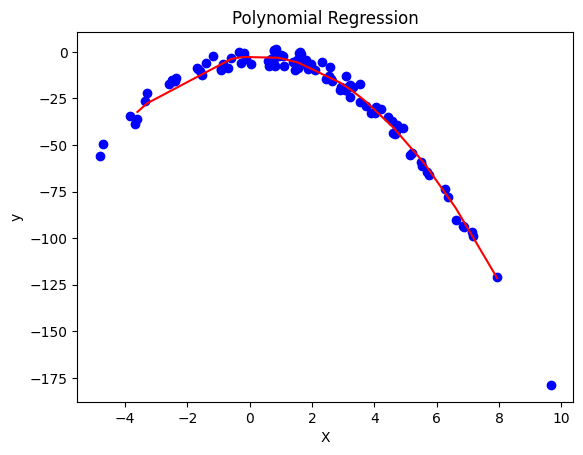

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import operator

# Generate some sample data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)

# Reshape X to be a 2D array
X = X[:, np.newaxis]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features to polynomial features
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")

# Visualize the results
plt.scatter(X, y, color='blue')
# Sort values for better plotting
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test, y_test_pred), key=sort_axis)
X_test, y_test_pred = zip(*sorted_zip)
plt.plot(X_test, y_test_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()

Fine-tuning the Model:- Two common techniques for hyperparameter tuning are Grid Search and Random Search

* Grid Search
Grid Search is an exhaustive search method that evaluates all possible combinations of hyperparameters specified in a grid. It is computationally expensive but ensures that the best combination is found.

* Random Search
Random Search evaluates a random subset of hyperparameter combinations. It is less computationally expensive and can still find good combinations, especially when the search space is large.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the Hyperparameter Grid:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [10]:
#Initialize the Model and Grid Search:
model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')



In [12]:
# Fit the Grid Search to the Training Data:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [13]:
# Evaluate best model:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Mean Squared Error: {mse}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Mean Squared Error: 1807.8916332668955


In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model and random search
rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1, verbose=2)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Test Mean Squared Error: {mse}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Test Mean Squared Error: 1807.4376355819215
